# Dataset - Fraud_check

### Objective:-
###               Use random forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [44]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Fraud_check.csv")

In [3]:
data.head(3)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES


# Understand the dataset

In [4]:
data.shape

(600, 6)

In [5]:
#Checking for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
# Checking of dublicate values
data[data.duplicated(keep=False)]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [7]:
# We will create numerical variable for categorical data
label_encoder = preprocessing.LabelEncoder()
data['Undergrad'] = label_encoder.fit_transform(data['Undergrad'])
data['Marital.Status'] = label_encoder.fit_transform(data['Marital.Status'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])

In [8]:
# We will take high income above 30000
data['Taxable.Income'] = (data["Taxable.Income"] > 30000)*1

In [9]:
x = data.drop(axis = 0, columns = "Taxable.Income")
y = data['Taxable.Income']

In [10]:
data["Taxable.Income"].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Splitting data into training and testing data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [13]:
model = RandomForestClassifier (n_estimators = 110, max_features = 3)

In [14]:
model.fit(x_train, y_train)

RandomForestClassifier(max_features=3, n_estimators=110)

In [15]:
from sklearn import metrics

In [16]:
Y_pred = model.predict(x_train)

In [17]:
print("accuracy: ", metrics.accuracy_score(y_train,Y_pred))

accuracy:  1.0


In [18]:
model.score(x_train, y_train)

1.0

In [19]:
y_pred = model.predict(x_test)

In [20]:
print("accuracy: ", metrics.accuracy_score(y_test, y_pred))

accuracy:  0.7333333333333333


In [21]:
model.score(x_test, y_test)

0.7333333333333333

In [23]:
feature_imp = pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending = False)
feature_imp

City.Population    0.534627
Work.Experience    0.275462
Marital.Status     0.080378
Undergrad          0.055793
Urban              0.053740
dtype: float64

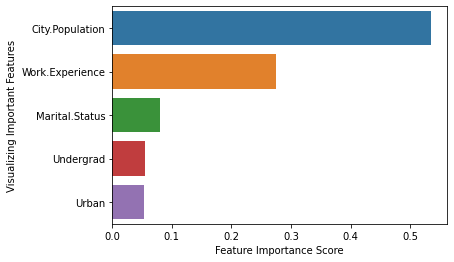

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add lablels to your graph
plt.xlabel("Feature Importance Score")
plt.ylabel("Visualizing Important Features")
plt.show()

In [26]:
train_accuracy = []
test_accuracy = []
for max_features in range(1,5):
    model = RandomForestClassifier(n_estimators=110, max_features=3)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

In [27]:
data = pd.DataFrame({'max_depth':range(1,5),'train_acc':train_accuracy, 'test_acc':test_accuracy})
data

,max_depth,train_acc,test_acc
0,1,1.0,0.722222
1,2,1.0,0.733333
2,3,1.0,0.727778
3,4,1.0,0.744444


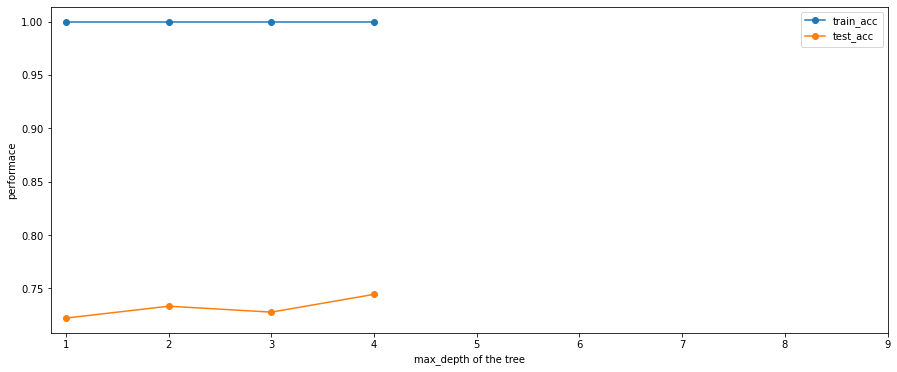

In [28]:
# visulizing accuracy graph to look over mox_depth
labels = ['train_acc','test_acc']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
plt.plot(data['max_depth'],data['train_acc'], marker = 'o')
plt.plot(data['max_depth'],data['test_acc'], marker = 'o')
ax.set_xticks(np.arange(1,10))
plt.legend(labels)
plt.xlabel('max_depth of the tree')
plt.ylabel('performace')
plt.show()

In [31]:
# Decision Tree Regression
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[  2,  41],
       [  7, 130]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.7444444444444445')

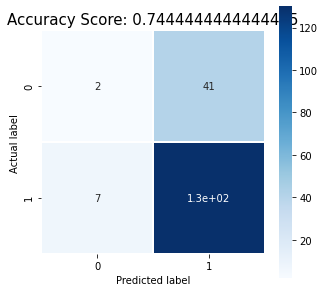

In [33]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data = cm, linewidths = .5, annot = True, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

In [34]:
# Predicting the values of test data
y_pred = model.predict(x_test)
print("Classification report - \n", classification_report(y_test, y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.33      0.07      0.12        43
           1       0.77      0.96      0.85       137

    accuracy                           0.74       180
   macro avg       0.55      0.51      0.48       180
weighted avg       0.66      0.74      0.68       180



In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [36]:
from sklearn.model_selection import KFold

In [45]:
kfold = KFold(n_splits = 8, random_state=7)

In [38]:
result = cross_val_score(model, x, y, cv=kfold)
print(result.mean())

0.7333333333333334


In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [48]:
num_trees = 10
seed = 7
kfold = KFold(n_splits = 10, random_state = seed)
model = AdaBoostClassifier(n_estimators = num_trees, random_state = seed)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7916666666666666


In [49]:
model.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=10, random_state=7)

In [50]:
from sklearn import metrics

In [51]:
Y_pred=model.predict(x_train)

In [52]:
print("accuracy: ", metrics.accuracy_score(y_train, Y_pred))

accuracy:  0.8071428571428572


In [53]:
model.score(x_train, y_train)

0.8071428571428572

In [54]:
y_pred=model.predict(x_test)

In [55]:
print("accuracy: ", metrics.accuracy_score(y_test,y_pred))

accuracy:  0.7611111111111111
